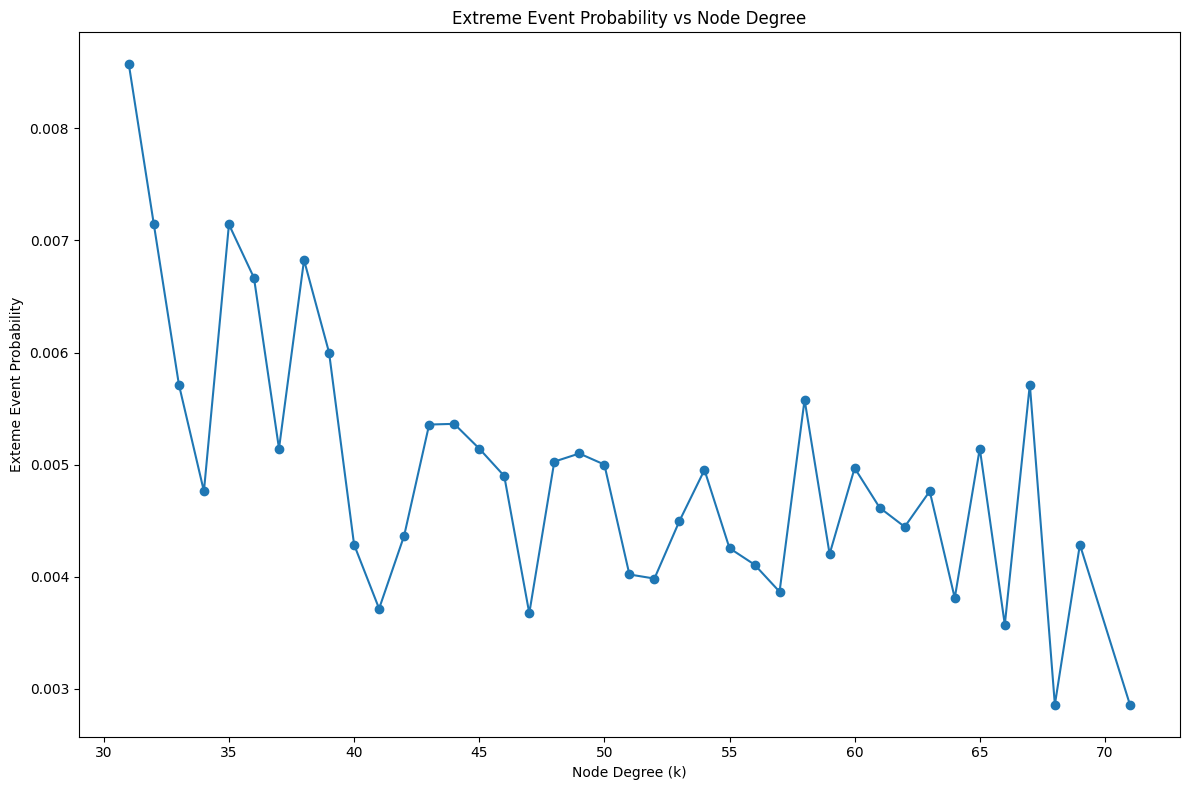

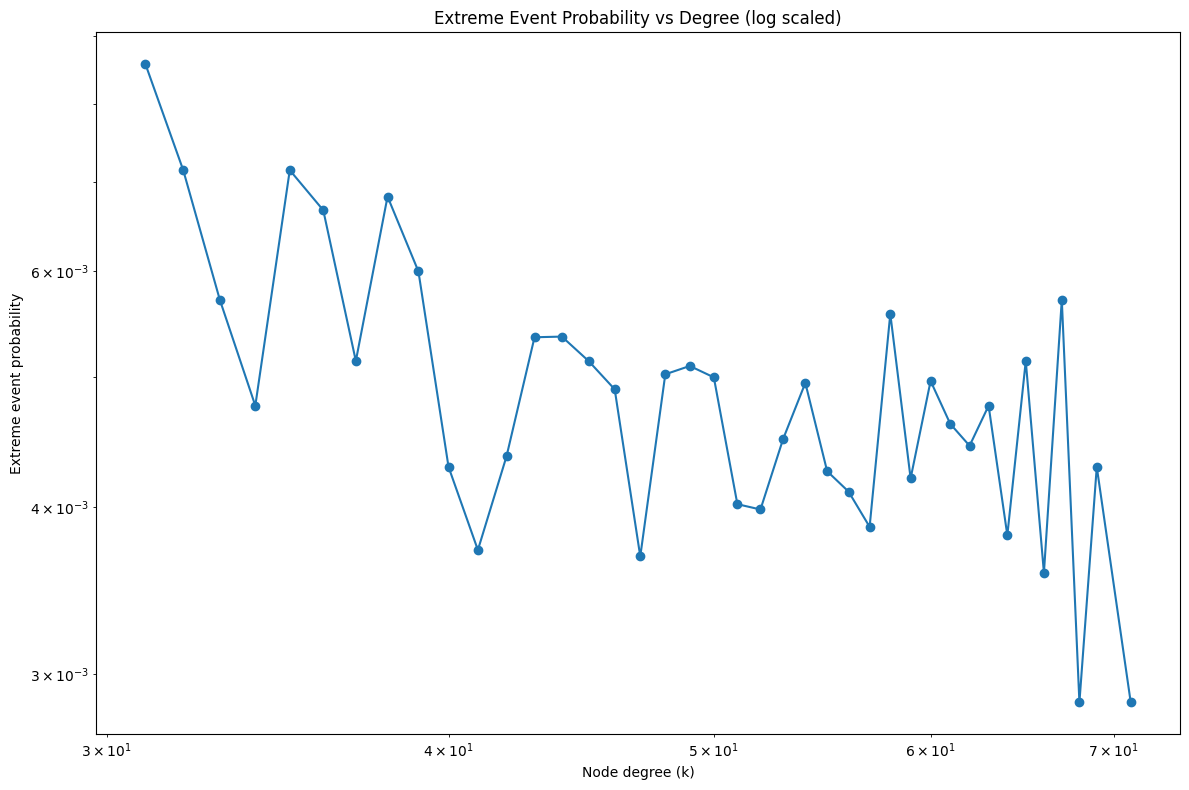

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

N = 1000
G = nx.erdos_renyi_graph(N, p=0.05)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(N, p=0.05)
neighbors_dict = {n: list(G.neighbors(n)) for n in G.nodes}


def random_walk(neighbors_dict, steps, node_0=0):
    current = node_0
    visits = np.zeros(len(neighbors_dict), dtype=int)
    for _ in range(steps):
        visits[current] += 1
        current = np.random.choice(neighbors_dict[current])
    return visits


N_runs = 350
steps = 5000

all_visits = []

for _ in range(N_runs):
    visits = random_walk(neighbors_dict,steps)
    all_visits.append(visits)

all_visits = np.array(all_visits)

# Here comes the pandasss!!!

df = pd.DataFrame(all_visits)
df.head()
mean_visits = df.mean()
std_visits = df.std()

EE_threshold = mean_visits + 3*std_visits

EE = (df > EE_threshold).sum()

degrees = np.array([G.degree(n) for n in G.nodes()])
EE_prob = EE/N_runs

analysis_df =  pd.DataFrame({"degree": degrees, "Extreme_Prob": EE_prob})
grouped = analysis_df.groupby("degree").mean().reset_index()

plt.figure(figsize=(12,8))
plt.plot(
    grouped["degree"],
    grouped["Extreme_Prob"],
    marker = 'o',
    linestyle = '-'
)
plt.xlabel("Node Degree (k)")
plt.ylabel("Exteme Event Probability")
plt.title("Extreme Event Probability vs Node Degree")

plt.tight_layout()
plt.show()
plt.figure(figsize=(12,8))

plt.loglog(
    grouped["degree"],
    grouped["Extreme_Prob"],
    marker='o',
    linestyle='-'
)

plt.xlabel("Node degree (k)")
plt.ylabel("Extreme event probability")
plt.title("Extreme Event Probability vs Degree (log scaled)")

plt.tight_layout()
plt.show()
